## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

In [21]:
import SolveTriangular
import math
import numpy as np
import scipy as sp
from numpy import sign
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify
nmax=400
tolx=1e-8

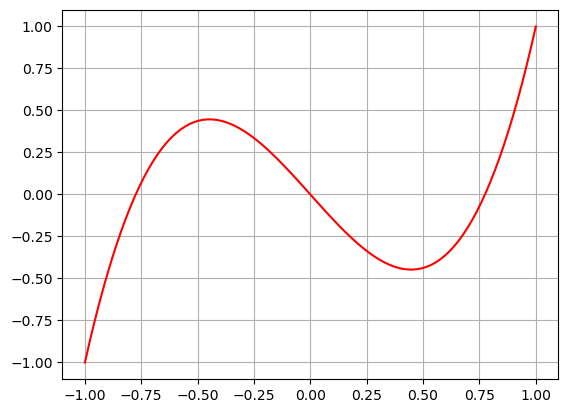

In [22]:
L = lambda x: (5*x**3 - 3*x) / 2
xx=np.linspace(-1,1,100)
plt.plot(xx,L(xx),'-r')
plt.grid(True)
plt.show()

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [23]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
    xk=[]
    fx0=fname(x0)
    if abs(fpname(x0))<=np.spacing(1):
        print(" derivata prima nulla in x0")
        return None, None,None
    
    d=fx0/fpname(x0)
    x1=x0-d
    fx1=fname(x1)
    xk.append(x1)
    it=1
    
    while it<nmax and  abs(fx1)>=tolf and abs(d)>=tolx*abs(x1) :
       x0=x1
       fx0=fname(x0)
       if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
            print(" derivata prima nulla in x0")
            return None, None,None
       d=fx0/fpname(x0)
       x1=x0-d  
       fx1=fname(x1)
       it=it+1
       xk.append(x1)
      
    if it==nmax:
        print('raggiunto massimo numero di iterazioni \n')
        
    return x1,it,xk

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [24]:
def metodo_bisezione(fname, a, b, tolx, tolf):
    fa=fname(a)
    fb=fname(b)
    if sign(fa)*sign(fb)>=0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None
    
    it = 0
    v_xk = []
    maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1
     
    while abs(b - a) > tolx:
       xk = a+(b-a)/2
       v_xk.append(xk)
       it += 1
       fxk=fname(xk)
        
       if fxk==0:
         return xk, it, v_xk
       if sign(fa)*sign(fxk)>0:
         a = xk
         fa=fxk
       elif sign(fxk)*sign(fb)>0:
         b = xk
         fb=fxk
           
    return xk, it, v_xk

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

In [25]:
L_diff = lambda x: (15*x**2-3)/2
x0=1
s,nit,v_s=newton(L,L_diff,x0,tolx, tolx,nmax)
print(s)

0.7745966692414835


Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

In [29]:
q = lambda x: L(x)/(x-s)

x=sym.symbols('x')
q1 =  (5*x**3-3*x)/((x-s)*2)
dq=sym.diff(q1,x,1)
dqdx=lambdify(x,dq,np)
x0=-0.5
s_q,nit_q,v_s_q= newton(q,dqdx,x0,tolx,tolx,nmax)
print(f'{s_q}\n{q(s_q)}\n{L(s_q)}')

-0.7745966728746388
7.0355754612671235e-09
-1.0899466662550594e-08


Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

In [30]:
qQ,itq,vqQ=metodo_bisezione(q,-1,1,tolx,tolx)
qL,itl,vql=metodo_bisezione(L,-1,1,tolx,tolx)
print(f'soluzione per q:{qQ}\nsol per L(x):{qL}')

Non è possibile applicare il metodo di bisezione 

soluzione per q:None
sol per L(x):0.0


                                                                                                                Punti [14]